# TORCH.AUTOGRAD를 사용한 자동 미분
매개변수(모델가중치)는 주어진 매개변수에 대한 손실함수의 변화도(gradient)에 따라 조정
- torch.autograd : 변화도 계산을 위한 자동미분 엔진

아래와 같은 입력 x, 매개변수 w, b 와 일부 손실함수가 있는 단일 계층 신경망 가정.
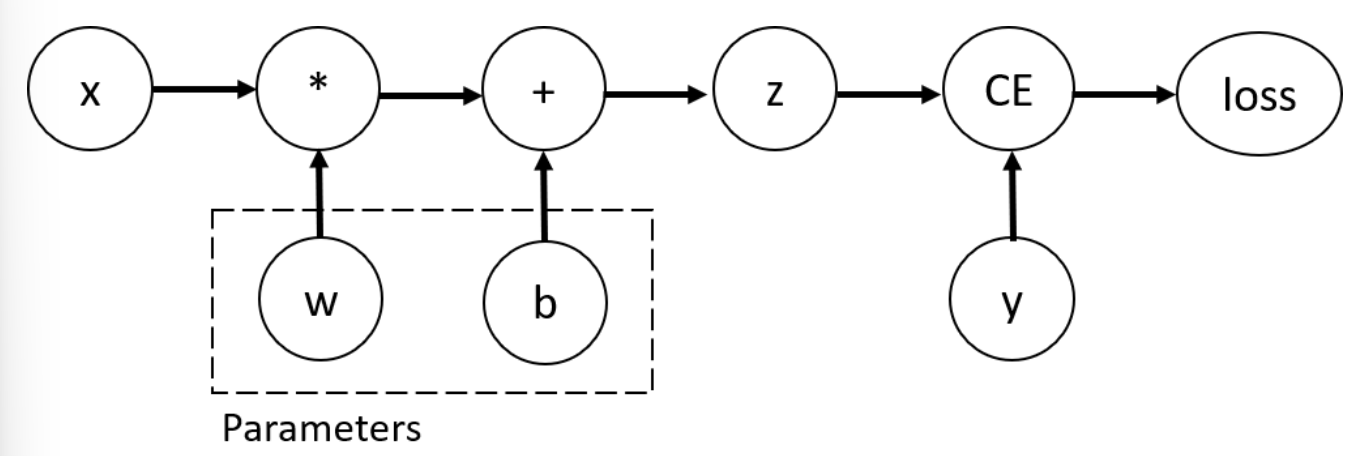

위 신경망에서 w, b는 최적화가 필요한 매개변수.<br>
위 변수들에 대한 손실함수의 변화도를 계산해야 함. 
- 이를 위해 해당 tensor에 requires_grad 속성을 설정

In [2]:
import torch

# 단일 계층 신경망 생성

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [3]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x000001654CBC06A0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x000001654CBC0FA0>


## 변화도 계산
신경망에서 매개변수 가중치 최적화시 매개변수에 대한 손실함수의 도함수를 계산해야 함. <br>
도함수 계산을 위해 loss.backward() 호출, w.grad와 b.grad에서 값을 가져옴

### 참고
- 연산 그래프의 잎(leaf) 노드들 중 requires_grad 속성이 True로 설정된 노드들의 grad 속성만 구할 수 있습니다. 그래프의 다른 모든 노드에서는 변화도가 유효하지 않습니다.

- 성능 상의 이유로, 주어진 그래프에서의 backward를 사용한 변화도 계산은 한 번만 수행할 수 있습니다. 만약 동일한 그래프에서 여러번의 backward 호출이 필요하면, backward 호출 시에 retrain_graph=True를 전달해야 합니다.

In [4]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3312, 0.1133, 0.1091],
        [0.3312, 0.1133, 0.1091],
        [0.3312, 0.1133, 0.1091],
        [0.3312, 0.1133, 0.1091],
        [0.3312, 0.1133, 0.1091]])
tensor([0.3312, 0.1133, 0.1091])


## 변화도 추적 멈추기
requires_grad=True 인 tensor들은 연산기록을 추적, 변화도 계산을 지원.<br>
모델 학습 후 입력데이터를 단순히 적용만 하는 (순전파 연산만 필요한) 경우 
- torch.no_grad()로 연산추적 중단 가능

변화도 추적 중단 이유
- 연산 속도 향상
- 신경망 일부 매개변수를 고정된 매개변수로 표시

In [5]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


- detach() 메소드를 사용해도 동일한 결과(연산추적 중단)

In [6]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False
